In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data loading

In [14]:
# loading of all the features
chunk_data = np.load('../processed_ntuples/chunking/chunk_wnu_data.npy')

# feats labels, including nu data and the new variables: Pelliccioli (cos\theta* in 1710.09339), Collins-Soper (cos\theta in 1605.05450), Atlas (cos\theta_2D in 1203.2165), Polish (R_pT in 1201.2768)
features = ['lepPt1', 'lepPt2', 'lepEta1', 'lepEta2', 'lepPhi1', 'lepPhi2', 'vbsjetPt1', 'vbsjetPt2',
            'vbsjetEta1', 'vbsjetEta2', 'vbsjetPhi1', 'vbsjetPhi2', 'vbsjetM1', 'vbsjetM2', 'nvbsjetPt1',
            'nvbsjetPt2', 'nvbsjetEta1', 'nvbsjetEta2', 'nvbsjetPhi1', 'nvbsjetPhi2', 'nvbsjetM1', 'nvbsjetM2',
            'mjj', 'detajj', 'ptMET', 'phiMET', 'ptv1', 'ptv2', 'etav1', 'etav2', 'phiv1', 'phiv2',
            'costheta_1', 'costheta_2', 'cos_cs', 'cos_th_1', 'cos_th_2', 'r_pt', 'flag']

# df
data_df = pd.DataFrame(dict(zip(features, chunk_data.T)))
data_df

,lepPt1,lepPt2,lepEta1,lepEta2,lepPhi1,lepPhi2,vbsjetPt1,vbsjetPt2,vbsjetEta1,vbsjetEta2,...,etav2,phiv1,phiv2,costheta_1,costheta_2,cos_cs,cos_th_1,cos_th_2,r_pt,flag
0,-0.384219,-0.919335,-1.444364,0.379386,-0.777735,-0.451011,-1.089352,0.144452,-0.992550,0.709488,...,-0.568074,0.710084,0.373748,-1.577276,0.271332,1.537623,0.382934,-1.929312,-0.132864,1.0
1,1.231413,-0.419090,-1.640480,-0.577148,1.259316,-0.676203,-0.366744,-0.437908,-1.145556,1.090068,...,-2.450763,0.146524,-1.548312,-1.436544,-0.258036,0.418376,1.647245,-0.047567,0.960210,1.0
2,1.459104,0.569787,0.810673,0.047107,-0.283659,1.063204,0.199381,-0.480528,0.700589,-1.326450,...,0.690841,-3.300144,0.946830,0.760210,0.007570,0.238993,-0.400837,0.667091,1.388626,1.0
3,1.131144,0.305541,1.168343,-1.195516,-0.982829,0.797235,-0.237110,0.724305,1.390020,-0.641935,...,0.583511,0.275725,-0.251561,0.917601,-0.720422,1.111751,-0.041240,0.710531,0.513909,1.0
4,-0.308250,-0.420657,0.261331,-0.333682,-0.782519,0.971536,-0.609954,-0.749876,-1.146362,1.192145,...,-0.940571,-0.266078,1.388287,0.304780,-0.518077,-0.450753,0.572468,0.781883,0.025318,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527370,0.395589,0.192478,0.373781,-0.901767,-2.082315,-0.822382,1.117974,0.754074,-0.699016,0.643707,...,-0.363812,-0.338052,1.113830,0.153026,-0.738943,-1.416999,-0.165517,0.616615,-0.555968,0.0
527371,1.288937,0.292290,0.392429,-1.931113,1.267861,-0.774225,-0.384767,0.343451,-1.450111,0.761413,...,-0.062710,-0.306715,-0.127376,0.338495,-1.406890,-1.552838,1.914164,0.945619,1.096849,0.0
527372,0.076040,-1.096191,-0.347462,1.032235,-0.009045,-0.053560,0.696440,0.509959,1.390492,-0.740706,...,0.003707,-0.217439,-0.329796,-1.070624,0.656867,-2.135095,-0.973672,-0.545879,-1.116825,0.0
527373,0.949786,0.404208,-0.229787,0.703927,0.170240,-1.711163,0.022414,-0.571811,-0.522218,0.795808,...,-0.283832,-1.049192,0.446542,-0.233048,0.663593,-0.667944,0.161726,-0.042047,1.242471,0.0


In [15]:
# ll: 153288, tl: 173972, tt: 200115
ll_df = data_df.iloc[:153288]
tl_df = data_df.iloc[153288:153288+173972]
tt_df = data_df.iloc[153288+173972:]
tx_df = data_df.iloc[153288:]

# Correlation matrices

LL data

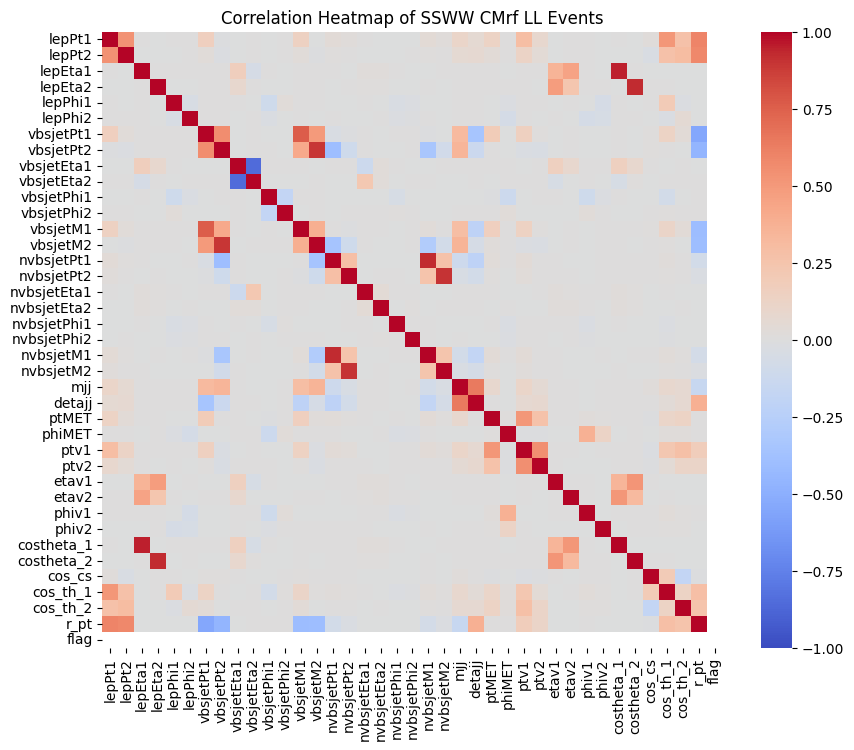

In [16]:
ll_corr_matrix = ll_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(ll_corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of SSWW CMrf LL Events')
plt.savefig('corr/ll_corr.png', dpi=500, bbox_inches='tight')

TL data

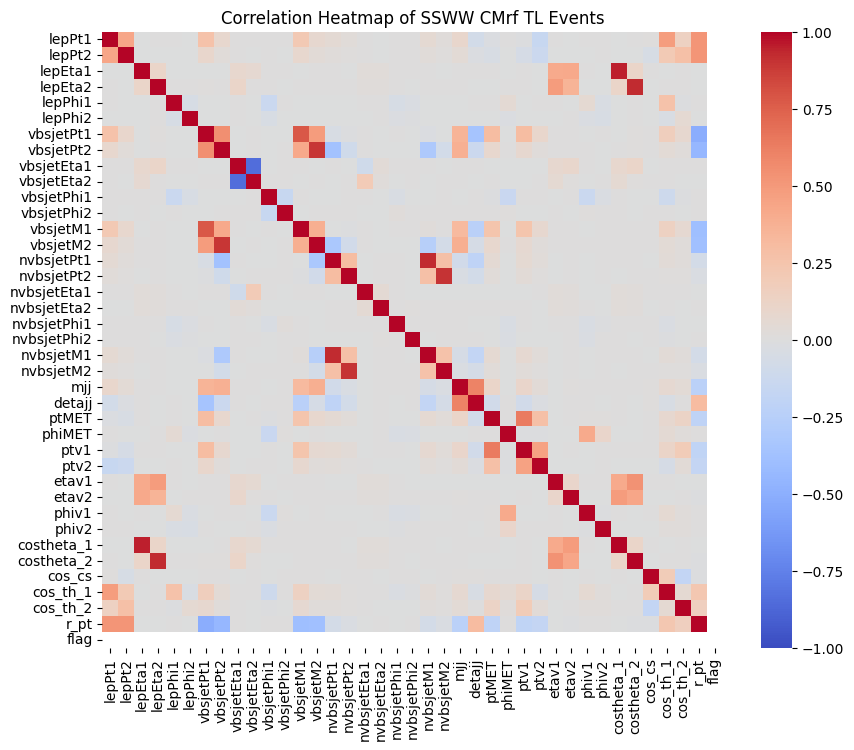

In [17]:
tl_corr_matrix = tl_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tl_corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TL Events')
plt.savefig('corr/tl_corr.png', dpi=500, bbox_inches='tight')

TT data

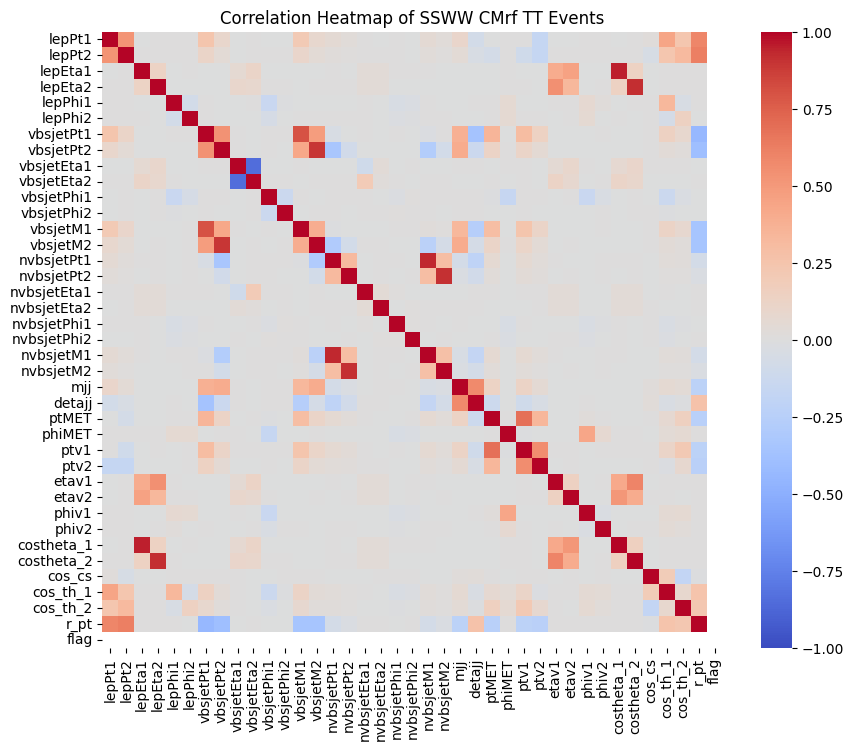

In [18]:
tt_corr_matrix = tt_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tt_corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TT Events')
plt.savefig('corr/tt_corr.png', dpi=500, bbox_inches='tight')

TX data (i.e. TL and TT)

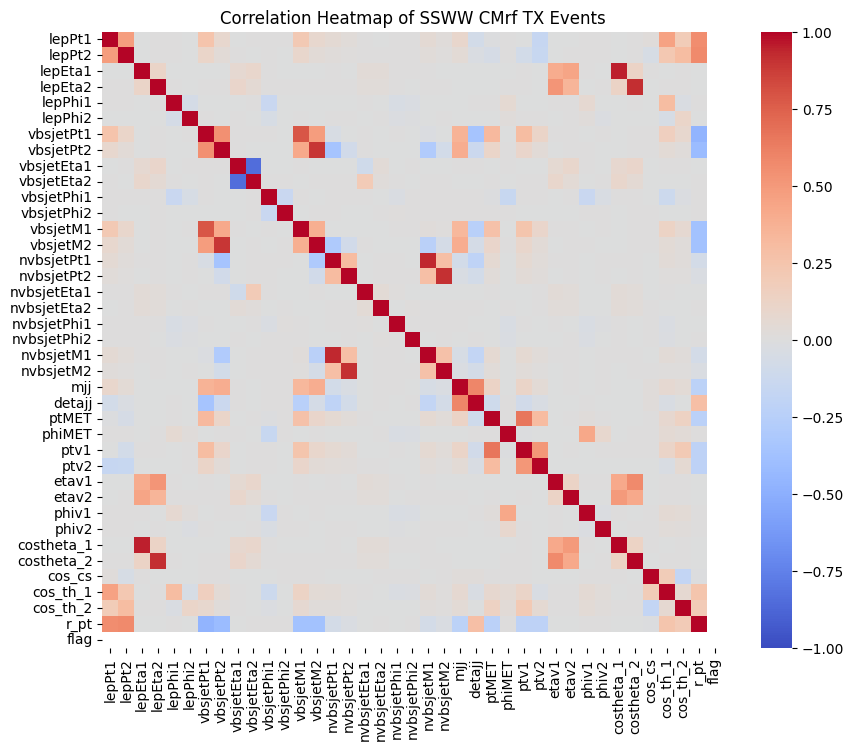

In [19]:
tx_corr_matrix = tx_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tx_corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TX Events')
plt.savefig('corr/tx_corr.png', dpi=500, bbox_inches='tight')

Full data

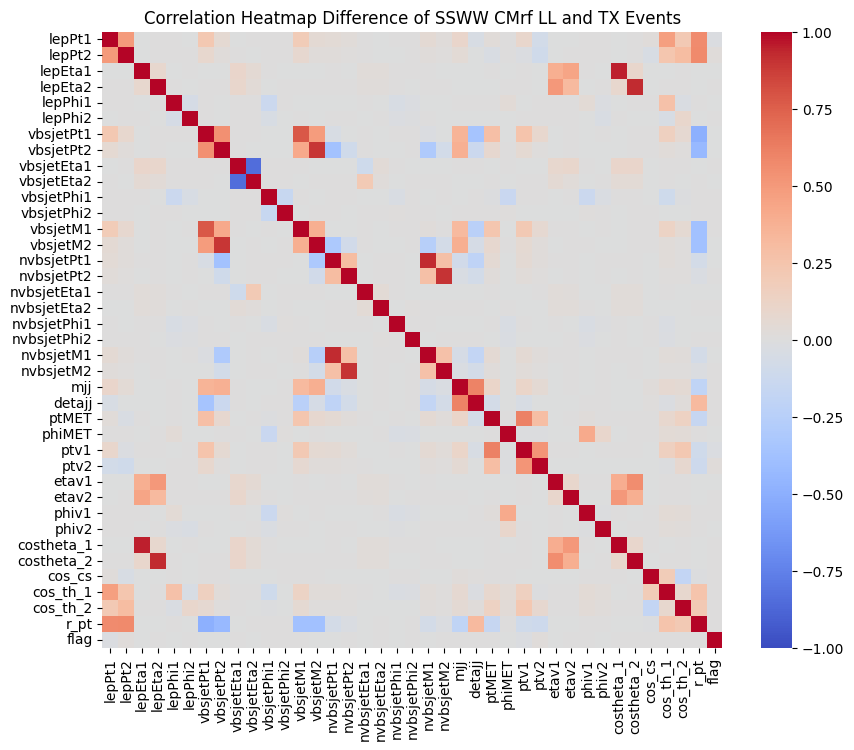

In [20]:
data_corr_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap Difference of SSWW CMrf LL and TX Events')
plt.savefig('corr/data_corr.png', dpi=500, bbox_inches='tight')

Signal minus background

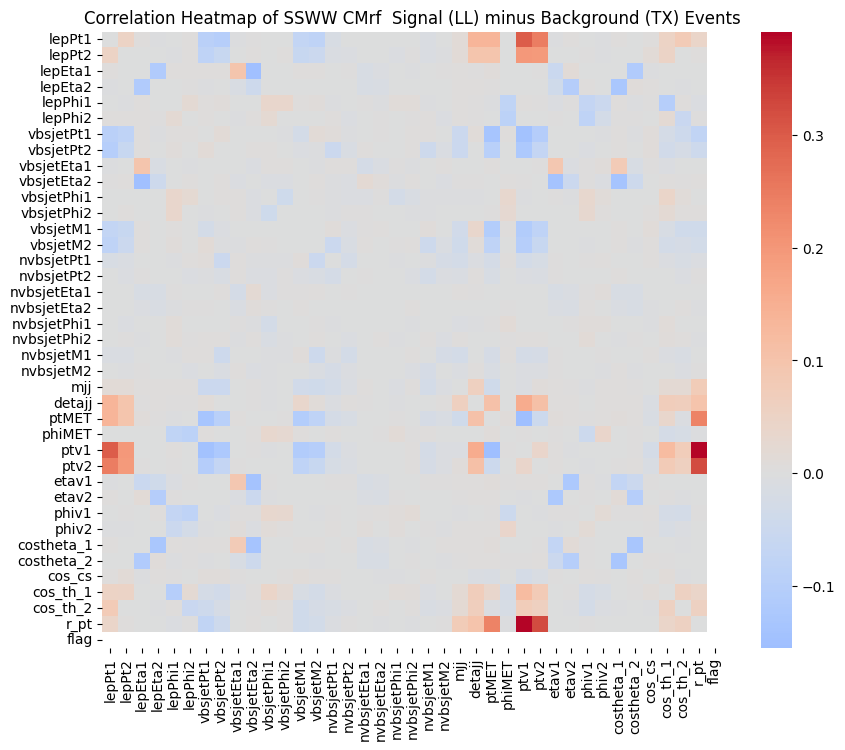

In [21]:
smb_corr_matrix = ll_corr_matrix - tx_corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(smb_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf  Signal (LL) minus Background (TX) Events')
plt.savefig('corr/smb_corr.png', dpi=500, bbox_inches='tight')

# Individual variable couples correlations

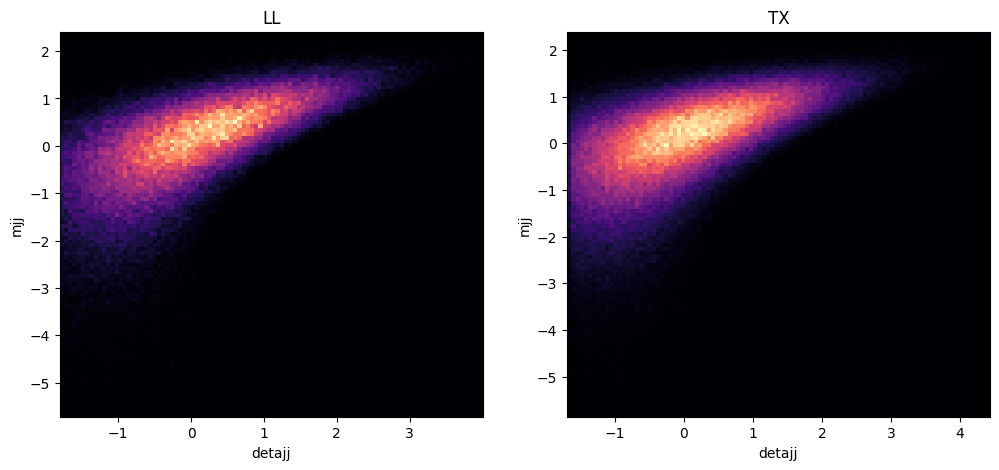

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
histll = ax[0].hist2d(ll_df['detajj'], ll_df['mjj'], bins=100, cmap='magma')
ax[0].set_xlabel('detajj')
ax[0].set_ylabel('mjj')
ax[0].set_title('LL')
histtx = ax[1].hist2d(tx_df['detajj'], tx_df['mjj'], bins=100, cmap='magma')
ax[1].set_xlabel('detajj')
ax[1].set_ylabel('mjj')
ax[1].set_title('TX')
plt.show()

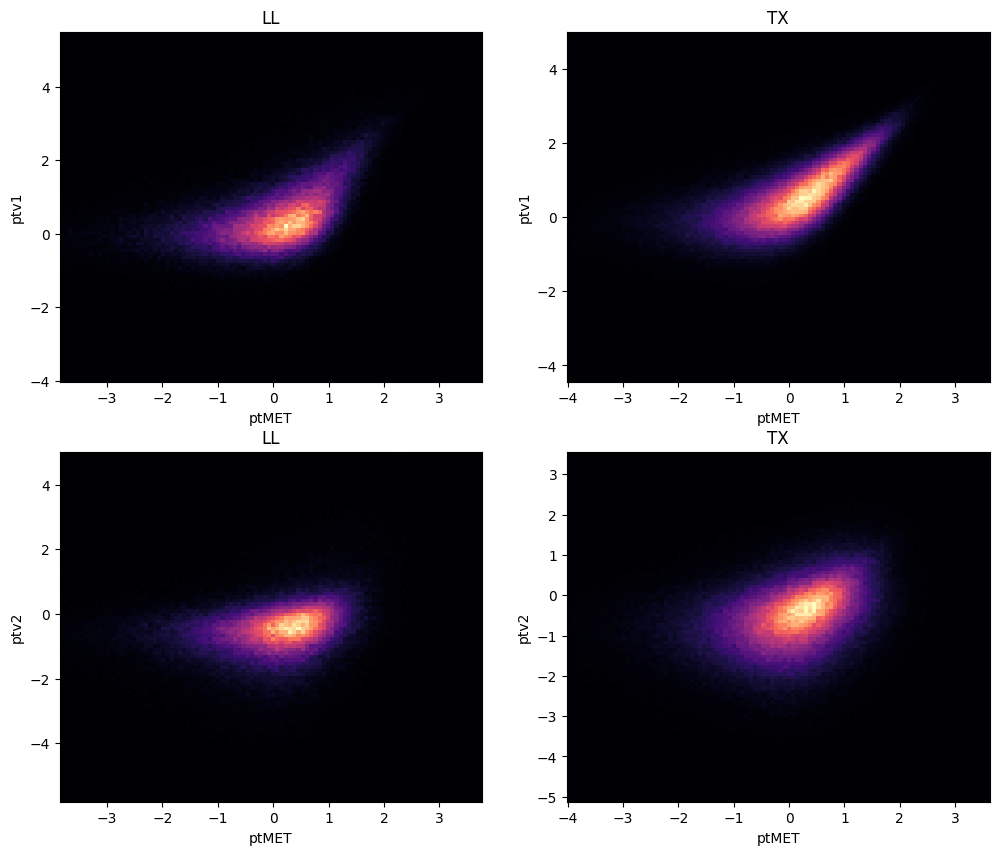

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
hist_ll1 = ax[0,0].hist2d(ll_df['ptMET'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('ptMET')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
hist_tx1 = ax[0,1].hist2d(tx_df['ptMET'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('ptMET')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
hist_ll2 = ax[1,0].hist2d(ll_df['ptMET'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('ptMET')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
hist_tx2 = ax[1,1].hist2d(tx_df['ptMET'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('ptMET')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
plt.show()

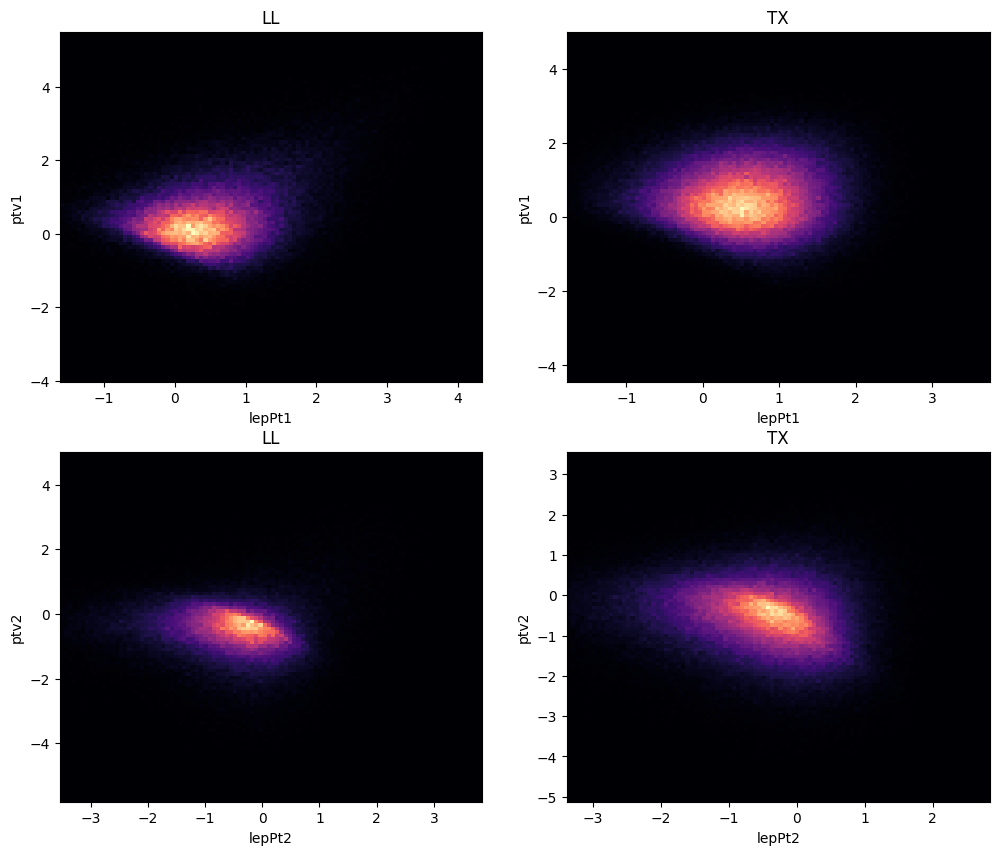

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# x_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['lepPt1'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('lepPt1')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['lepPt1'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('lepPt1')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['lepPt2'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('lepPt2')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['lepPt2'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('lepPt2')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

plt.savefig('corr/lepPt-ptv.png')
plt.show()

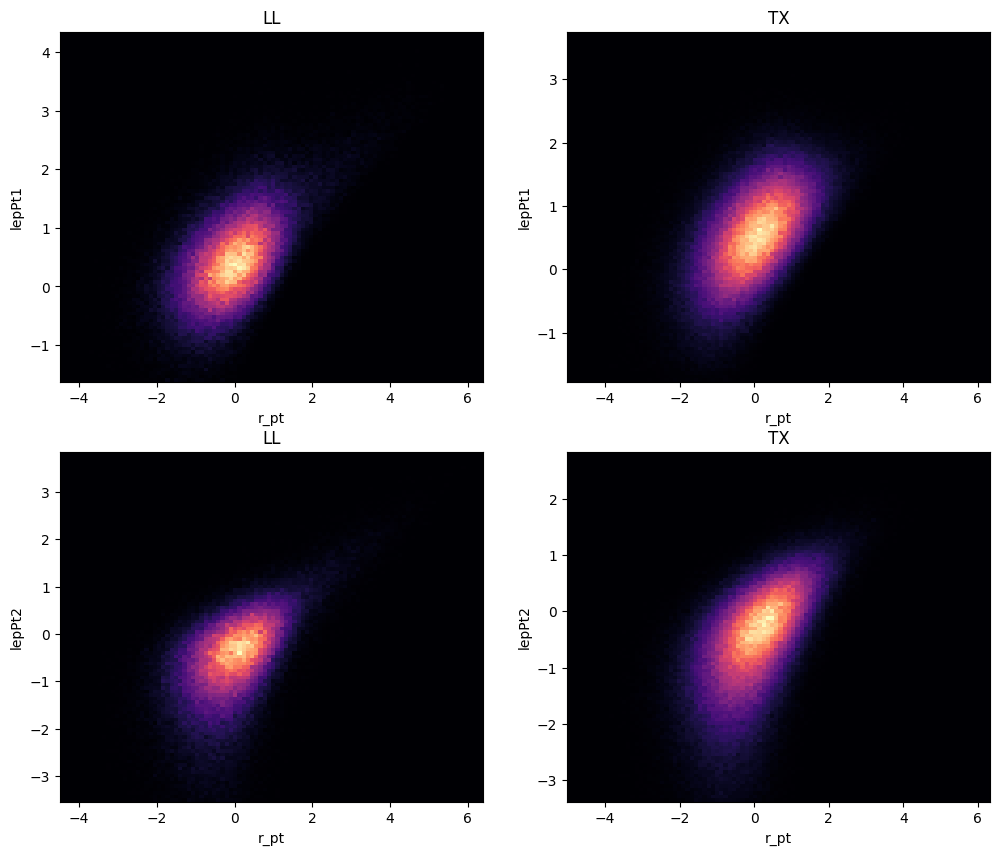

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))

#ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['lepPt1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('lepPt1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['lepPt1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('lepPt1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['lepPt2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('lepPt2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['lepPt2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('lepPt2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)
plt.show()

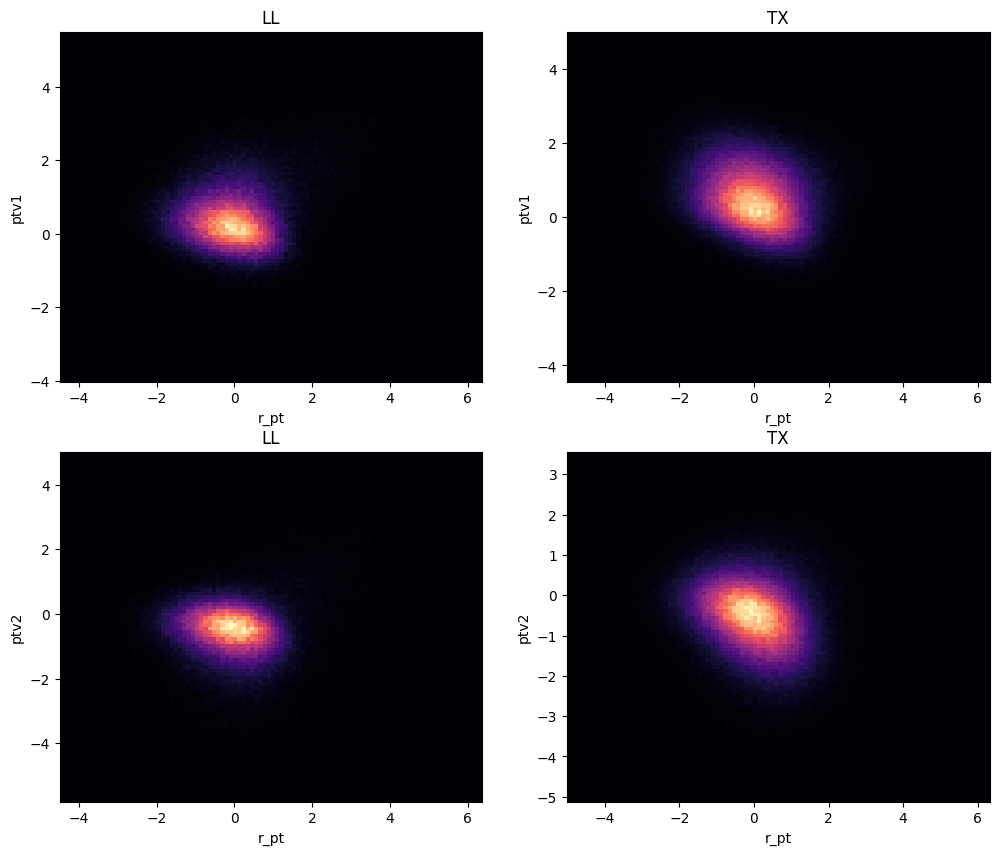

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

plt.savefig('corr/rPt-ptv.png')
plt.show()

In [27]:
#